In [ ]:
!unzip /content/drive/MyDrive/'_Twitter - Data-20211011T052737Z-002.zip' -d Twitter

In [ ]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=96eb557b41bf8b12c4d850c9028c07088134d828afb39781ebccae5f15e3c04d
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
import pandas as pd
import plotly.graph_objects as go

In [ ]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

## Load data

In [ ]:
df = pd.read_csv('/content/Twitter/_Twitter - Data/tweets_2021.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,4,5,38) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
twitter = df[['user.id_str','user.name','user.screen_name','user.created_at','user.location','id_str','created_at','full_text','lang','entities.hashtags','quoted_status.id_str','quoted_status.full_text','quoted_status.entities.hashtags','user.friends_count','user.followers_count']]

In [ ]:
twitter.rename(columns = {'user.id_str':'user_id', 'user.name':'username',
                              'user.screen_name':'user_screename',
                              'user.created_at':'user_created_at','user.location':'user_location', 'id_strt':'tweet_id',
                              'created_at':'tweet_created_at',
                              'lang':'tweet_lang',  'full_text':'tweet_text','entities.hashtags':'hashtags', 'quoted_status.id_str':'quoted_status_id',
                              'quoted_status.full_text':'quoted_status_text',
                              'quoted_status.entities.hashtags':'quoted_status_hashtag',
                           'user.friends_count':'friends_count', 'user.followers_count':'followers_count'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
twitter.head(10)

,user_id,username,user_screename,user_created_at,user_location,id_str,tweet_created_at,tweet_text,tweet_lang,hashtags,quoted_status_id,quoted_status_text,quoted_status_hashtag,friends_count,followers_count
0,1.319008e+18,🏴‍☠️ Tongo Bozzie 🏴‍☠️,Noneofthemknew1,2020-10-21 20:08:07+00:00,"South West, England",1345359931550134272,2021-01-02 13:22:57+00:00,So ready ✨ for the next #DeppMovieNight\n\nFil...,en,"[{'indices': [24, 39], 'text': 'DeppMovieNight...",1.345348e+18,You all ready for another #DeppMovieNight tomo...,"[{'indices': [26, 41], 'text': 'DeppMovieNight...",544.0,747.0
1,6.323772e+06,Nor33 🇫🇷,Angiex0101,2007-05-25 18:55:38+00:00,France,1345359929507459075,2021-01-02 13:22:57+00:00,#Johnuary #DeppMovieNight #JusticeForJohnnyDep...,und,"[{'indices': [0, 9], 'text': 'Johnuary'}, {'in...",1.341110e+18,Starting time for #Johnuary's #DeppMovieNight ...,"[{'indices': [18, 27], 'text': 'Johnuary'}, {'...",52.0,159.0
2,9.126742e+17,Vive Harris,viverachel,2017-09-26 13:44:20+00:00,NaN,1345359711101624321,2021-01-02 13:22:05+00:00,That’s today🎊#DeppMovieNight #Johnuary #Justic...,en,"[{'indices': [13, 28], 'text': 'DeppMovieNight...",1.345241e+18,Join 24-hour marathon for #DeppMovieNight on J...,"[{'indices': [26, 41], 'text': 'DeppMovieNight...",432.0,118.0
3,1.325068e+18,pirate🏴‍☠️ #justiceforjohnnydepp,sharron67204447,2020-11-07 13:30:15+00:00,Hastings,1345359532659265536,2021-01-02 13:21:22+00:00,"Amber Heard is an abuser a liar and a fraud, s...",en,"[{'indices': [179, 200], 'text': 'Justiceforjo...",NaN,NaN,NaN,220.0,207.0
4,1.243815e+18,Liono,f_liono,2020-03-28 08:20:34+00:00,NaN,1345358697959047168,2021-01-02 13:18:03+00:00,@_missyc97_ 2021 to Amber Heard.😂 https://t.co...,en,[],NaN,NaN,NaN,956.0,501.0
5,1.230585e+18,Pæpp,paepp_hub,2020-02-20 20:07:14+00:00,Napoli,1345358493126189056,2021-01-02 13:17:14+00:00,@nadiaexoxo #oggicosi #domaniriciclo no preocc...,it,"[{'indices': [12, 21], 'text': 'oggicosi'}, {'...",NaN,NaN,NaN,1394.0,2483.0
6,6.323772e+06,Nor33 🇫🇷,Angiex0101,2007-05-25 18:55:38+00:00,France,1345358250112376832,2021-01-02 13:16:17+00:00,#Johnuary #DeppMovieNight #JusticeForJohnnyDepp,und,"[{'indices': [0, 9], 'text': 'Johnuary'}, {'in...",1.345348e+18,Are you ready?! \n #Johnuary \n#DeppMovieNigh...,"[{'indices': [18, 27], 'text': 'Johnuary'}, {'...",52.0,159.0
7,3.342474e+09,Black Rose🌹🖤,Jennyfl0wer,2015-06-23 08:55:31+00:00,In the wood,1345358033149431810,2021-01-02 13:15:25+00:00,@JohnLe412 She's so fake!!!\n#AmberHeardIsAnAb...,en,"[{'indices': [28, 49], 'text': 'AmberHeardIsAn...",NaN,NaN,NaN,1670.0,2613.0
8,1.296110e+18,Life's a bitch. Now so am I!,hearmeroarXx,2020-08-19 15:41:29+00:00,NaN,1345357703099666433,2021-01-02 13:14:06+00:00,"Amber Heard's face is so triggering to me, let...",en,[],1.345281e+18,Amber Heard talks domestic violence in GirlGaz...,"[{'indices': [53, 74], 'text': 'JusticeForJohn...",456.0,515.0
9,7.101272e+08,frank drebin,danblock4,2012-07-22 05:03:35+00:00,NaN,1345357307115307009,2021-01-02 13:12:32+00:00,When Amber Heard is in the mood but her mortal...,en,[],NaN,NaN,NaN,432.0,1186.0


## Expolratory Data Analysis

## Top 50 Users with Most Tweets

In [ ]:
tweets = pysqldf('''SELECT username, user_screename as screenname,count(id_str) as tweets from twitter GROUP BY user_screename ORDER BY "tweets" DESC LIMIT 50 ''')
tweets

,username,screenname,tweets
0,Teri Carson ☠️ 🇮🇪 💀 🇨🇮 ☠️,TeriCarson,2535
1,Libby ♿️🏴‍☠️🇺🇸 #JusticeForJohnnyDepp,DeppSoldier_22,2379
2,Ciang385,CiaraFutalan,1770
3,Sam Cooke ☢😎🙏🇬🇧,Scookey2045,1674
4,JusticeForJohnny,Hansen7Ane,1666
5,Nor33 🇫🇷,Angiex0101,1662
6,Ewinters Wald-Mignon,ElizaDFTW,1356
7,For Johnny,Platoon1979,1334
8,Linda Lou - 🇺🇸 🏴‍☠️🏴‍☠️,PlzeExplain512,1316
9,KTN1220,KTN12201,1194


In [ ]:
fig = go.Figure(data=[go.Bar(
            x=tweets.screenname, y=tweets.tweets,
            text=tweets.username,
            textposition='auto',
        )])
fig.show()

## * From this We can see the top user with most tweets and there user and screen name whose tweets count is ranging from Appox 500 to 2500 tweets

## Top Friends and Followers count

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Friends Count',x =tweets.screenname,  y=tweets.friends_count),
    go.Bar(name='Followers Count',x =tweets.screenname,  y=tweets.followers_count)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

## First and Last Tweet in this dataset

In [ ]:
print('The time series starts from: ', twitters.tweet_created_at.min())
print('The time series ends on: ', twitters.tweet_created_at.max())

The time series starts from:  2021-01-01 00:00:07
The time series ends on:  2021-04-25 23:59:06


* The data is consist of 4 Months ranging from 1 january 2021 to 25 April 2021

## Per Months Tweets by all users

In [ ]:
import plotly.express as px

In [ ]:
fig = go.Figure(data=[go.Bar(
            x=twitters.tweet_created_at_month_name.value_counts().index, y=twitters.tweet_created_at_month_name.value_counts().values,
            text=twitters.tweet_created_at_month_name.value_counts().values,
            textposition='auto',
        )])
fig.show()

## Tweets per Day

In [ ]:
fig = go.Figure(data=[go.Bar(
            x=twitters.tweet_created_at_day_name.value_counts().index, y=twitters.tweet_created_at_day_name.value_counts().values,
            text=twitters.tweet_created_at_day_name.value_counts().values,
            textposition='auto',
            marker_color=twitters.tweet_created_at_day_name.value_counts().values
        )])
fig.show()

## Total Tweets in 4 Months

In [ ]:
pd.crosstab([twitters["tweet_created_at_hour"]], twitters["tweet_created_at_minutes"], 
            margins = True).style.background_gradient(cmap = "summer_r")

tweet_created_at_minutes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,All
tweet_created_at_hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,197,161,160,162,147,149,175,191,170,171,158,156,172,156,142,185,149,153,140,146,141,137,148,139,162,146,149,155,147,158,146,142,134,134,135,150,139,133,136,134,148,141,127,162,163,139,136,147,166,153,124,160,143,140,128,133,125,149,129,135,8953
1,143,128,129,130,158,153,135,146,154,149,146,136,127,134,124,145,118,129,130,134,135,121,127,116,135,115,127,113,137,118,134,117,124,116,103,108,126,139,105,127,114,129,129,102,122,112,125,125,145,124,115,155,121,129,131,107,115,111,110,124,7636
2,114,98,115,133,130,117,115,117,124,115,113,122,114,134,144,119,141,104,104,120,124,113,110,139,114,119,107,105,122,113,130,120,121,108,128,123,105,115,108,92,110,104,104,106,110,115,130,103,118,85,107,126,114,129,96,115,110,112,89,106,6898
3,121,102,119,105,103,118,102,119,113,109,135,112,97,122,114,115,102,112,125,109,97,118,103,133,109,99,116,102,106,111,121,103,103,104,94,101,115,128,99,96,101,109,103,92,103,126,108,98,104,91,108,118,100,104,89,91,101,104,95,89,6446
4,87,98,100,95,81,88,90,83,121,100,90,94,94,101,114,80,86,85,93,98,88,84,74,87,86,72,93,83,67,89,86,73,84,90,91,91,95,89,82,78,76,100,91,72,80,72,72,118,106,81,88,80,104,110,94,84,77,88,98,97,5348
5,102,89,86,103,94,83,101,83,95,85,92,79,95,80,71,86,77,85,91,97,80,78,92,81,84,80,68,77,78,75,82,73,92,79,78,87,81,83,76,76,79,76,74,57,81,83,72,84,78,92,73,83,88,85,84,79,80,80,82,120,5004
6,119,98,117,94,94,98,81,106,94,75,87,77,78,76,98,99,80,91,96,89,87,97,81,82,87,102,98,89,86,89,97,69,69,89,82,80,88,77,67,73,80,78,86,84,76,95,87,88,73,96,69,88,72,88,87,84,81,101,90,99,5238
7,91,91,121,81,92,98,84,91,95,94,85,114,104,86,90,91,87,100,100,103,91,92,90,105,102,81,93,78,92,89,93,89,83,107,91,83,83,98,87,80,100,92,86,97,92,104,102,123,99,100,118,96,98,110,94,100,95,90,103,116,5720
8,94,96,131,107,109,113,105,99,89,101,108,103,110,101,99,106,117,98,106,105,120,96,114,104,108,98,92,94,120,100,107,98,105,87,96,106,109,102,124,110,106,89,100,120,112,105,100,74,96,100,100,118,93,108,97,126,107,111,105,117,6271


## Tweets in 4 months per month bases

In [ ]:
rslt_df = twitters.loc[twitters['tweet_created_at_month_name'] == 'January']

In [ ]:
pd.crosstab([rslt_df["tweet_created_at_hour"]], rslt_df["tweet_created_at_minutes"], 
            margins = True).style.background_gradient(cmap = "summer_r")

tweet_created_at_minutes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,All
tweet_created_at_hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,61,51,47,53,43,39,59,54,54,37,51,36,48,55,45,71,48,52,51,48,45,40,43,47,62,42,49,45,46,52,40,41,49,38,38,52,40,38,34,52,48,49,38,51,38,42,42,39,49,46,33,43,40,43,33,36,44,38,43,39,2730
1,33,35,34,32,47,39,37,41,53,36,52,43,37,31,35,43,31,39,35,38,35,38,37,37,35,34,38,30,50,22,34,27,34,36,37,30,40,48,38,40,36,49,47,37,43,34,45,40,42,33,34,44,44,36,43,36,42,35,28,41,2280
2,34,33,44,46,44,39,44,42,35,35,39,28,36,40,43,38,46,31,43,36,37,35,34,40,45,43,37,32,41,30,35,32,26,30,32,34,30,38,41,29,35,28,30,34,33,38,43,30,28,30,31,28,36,40,31,32,30,33,22,27,2116
3,35,23,38,33,28,39,24,35,33,36,40,30,32,25,35,27,27,35,43,23,32,31,32,34,36,42,36,27,41,33,42,29,38,35,20,34,30,36,29,30,23,28,27,30,24,42,37,28,34,22,31,32,27,36,25,23,30,34,28,28,1897
4,36,29,24,24,23,19,39,27,20,33,23,24,35,34,30,25,9,29,26,28,17,24,28,27,27,24,22,32,28,32,28,23,22,27,23,30,19,22,23,24,19,23,36,15,23,17,24,28,39,25,22,25,41,32,31,31,28,27,36,29,1590
5,26,21,25,37,31,21,29,25,22,23,29,22,28,27,17,19,27,22,29,28,15,23,39,32,27,28,23,25,24,17,28,19,27,20,31,36,26,27,16,18,20,22,22,15,8,30,22,13,23,28,20,24,25,22,31,24,27,22,31,38,1476
6,38,33,31,33,32,31,22,35,24,24,28,27,22,22,26,31,23,30,29,27,20,33,19,19,25,34,25,29,20,22,23,15,20,26,25,26,18,25,16,17,21,23,17,25,21,34,17,12,17,22,24,15,14,20,23,24,18,27,22,21,1442
7,29,14,27,18,29,29,17,20,13,16,13,29,22,20,27,24,19,30,19,16,16,24,14,24,26,23,37,21,18,25,16,13,20,30,33,17,19,23,17,17,18,20,21,28,19,26,18,37,30,28,31,32,28,23,19,23,20,18,24,37,1364
8,23,18,36,24,28,33,24,25,22,16,26,21,28,25,26,24,21,19,23,18,22,14,31,25,26,19,29,23,24,22,21,15,23,16,27,21,24,30,36,28,18,17,16,31,24,15,21,18,26,16,19,34,20,29,23,23,27,24,26,30,1413


## All Users Tweets Trends in month of January per Hour

In [ ]:
mt = rslt_df.tweet_created_at_hour.value_counts(sort=False) 

In [ ]:
pd.crosstab([twitters["tweet_created_at_hour"]], twitters["tweet_created_at_minutes"], 
            margins = True).style.background_gradient(cmap = "summer_r")

tweet_created_at_minutes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,All
tweet_created_at_hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,197,161,160,162,147,149,175,191,170,171,158,156,172,156,142,185,149,153,140,146,141,137,148,139,162,146,149,155,147,158,146,142,134,134,135,150,139,133,136,134,148,141,127,162,163,139,136,147,166,153,124,160,143,140,128,133,125,149,129,135,8953
1,143,128,129,130,158,153,135,146,154,149,146,136,127,134,124,145,118,129,130,134,135,121,127,116,135,115,127,113,137,118,134,117,124,116,103,108,126,139,105,127,114,129,129,102,122,112,125,125,145,124,115,155,121,129,131,107,115,111,110,124,7636
2,114,98,115,133,130,117,115,117,124,115,113,122,114,134,144,119,141,104,104,120,124,113,110,139,114,119,107,105,122,113,130,120,121,108,128,123,105,115,108,92,110,104,104,106,110,115,130,103,118,85,107,126,114,129,96,115,110,112,89,106,6898
3,121,102,119,105,103,118,102,119,113,109,135,112,97,122,114,115,102,112,125,109,97,118,103,133,109,99,116,102,106,111,121,103,103,104,94,101,115,128,99,96,101,109,103,92,103,126,108,98,104,91,108,118,100,104,89,91,101,104,95,89,6446
4,87,98,100,95,81,88,90,83,121,100,90,94,94,101,114,80,86,85,93,98,88,84,74,87,86,72,93,83,67,89,86,73,84,90,91,91,95,89,82,78,76,100,91,72,80,72,72,118,106,81,88,80,104,110,94,84,77,88,98,97,5348
5,102,89,86,103,94,83,101,83,95,85,92,79,95,80,71,86,77,85,91,97,80,78,92,81,84,80,68,77,78,75,82,73,92,79,78,87,81,83,76,76,79,76,74,57,81,83,72,84,78,92,73,83,88,85,84,79,80,80,82,120,5004
6,119,98,117,94,94,98,81,106,94,75,87,77,78,76,98,99,80,91,96,89,87,97,81,82,87,102,98,89,86,89,97,69,69,89,82,80,88,77,67,73,80,78,86,84,76,95,87,88,73,96,69,88,72,88,87,84,81,101,90,99,5238
7,91,91,121,81,92,98,84,91,95,94,85,114,104,86,90,91,87,100,100,103,91,92,90,105,102,81,93,78,92,89,93,89,83,107,91,83,83,98,87,80,100,92,86,97,92,104,102,123,99,100,118,96,98,110,94,100,95,90,103,116,5720
8,94,96,131,107,109,113,105,99,89,101,108,103,110,101,99,106,117,98,106,105,120,96,114,104,108,98,92,94,120,100,107,98,105,87,96,106,109,102,124,110,106,89,100,120,112,105,100,74,96,100,100,118,93,108,97,126,107,111,105,117,6271


In [ ]:
fig = go.Figure(data=[go.Bar(
            x=rslt_df.tweet_created_at_hour.value_counts(sort=False).index, y=rslt_df.tweet_created_at_hour.value_counts(sort=False).values,
            textposition='auto',
            marker_color=rslt_df.tweet_created_at_hour.value_counts(sort=False).values
        )])
fig.show()

## Top User Per Hour Tweets top Users

In [ ]:
rslt_df = twitters.loc[twitters['user_screename'] == 'TeriCarson']

In [ ]:
pd.crosstab([rslt_df["tweet_created_at_hour"]], rslt_df["tweet_created_at_minutes"], 
            margins = True).style.background_gradient(cmap = "summer_r")

tweet_created_at_minutes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,All
tweet_created_at_hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,2,2,2,5,3,0,2,2,0,3,1,5,0,0,3,4,0,4,2,1,2,1,0,2,4,3,0,2,4,2,2,1,1,2,3,3,1,0,0,2,0,2,1,1,0,1,0,1,2,0,0,1,2,2,2,1,0,93
1,1,1,0,1,1,1,2,2,2,0,1,2,0,1,0,0,1,2,3,1,2,1,2,2,3,0,3,1,2,1,2,2,1,0,0,0,4,4,2,1,1,3,0,0,0,1,1,1,3,3,3,0,1,0,0,1,2,1,0,2,78
2,1,4,1,3,1,0,0,0,1,2,2,2,1,0,1,0,3,3,2,3,0,0,0,0,2,2,1,1,1,2,2,0,1,4,3,1,0,3,2,0,1,2,1,1,1,1,1,0,1,0,0,1,1,3,0,1,3,1,0,0,74
3,3,2,1,1,1,0,2,0,0,5,3,1,2,0,1,3,0,0,3,1,0,1,1,1,1,1,1,0,2,0,0,0,2,0,0,0,1,3,5,1,2,1,2,2,0,1,1,0,0,1,4,4,3,2,1,1,1,3,4,0,82
4,0,4,0,0,1,0,0,2,4,5,5,2,2,6,10,5,1,4,1,3,1,0,0,1,5,0,1,1,0,1,1,0,1,1,2,2,0,0,3,0,1,0,3,0,2,0,0,3,2,2,0,1,2,1,0,0,1,0,1,0,94
5,1,2,2,3,0,0,2,2,1,1,1,1,2,2,2,1,1,2,3,2,5,2,1,0,4,2,0,2,0,1,2,2,1,3,2,1,3,2,0,0,1,0,0,0,0,1,2,1,2,1,1,1,3,1,0,0,0,0,0,0,78
6,0,0,2,5,4,1,1,1,0,0,0,0,0,0,0,0,1,2,0,0,0,3,1,1,0,3,1,0,1,1,1,1,0,2,1,1,6,0,1,2,2,3,1,0,1,1,1,0,2,0,0,0,1,5,1,2,2,0,2,3,70
7,5,3,7,4,2,1,0,0,4,2,3,2,1,3,0,0,1,3,3,1,1,0,2,3,3,2,1,2,2,1,1,5,2,3,1,0,2,3,0,0,2,2,1,2,1,1,7,4,3,3,4,4,3,6,3,6,1,3,1,2,138
8,4,1,2,3,4,0,0,1,2,2,2,1,5,2,4,5,1,4,3,5,3,3,5,1,2,1,1,3,3,1,1,2,2,2,2,4,2,3,2,1,2,4,7,2,2,5,4,1,4,1,6,2,0,1,0,3,3,1,1,6,150


## Top User Tweets Per Month and Day

In [ ]:
tweetz = pysqldf('''SELECT username, user_screename as screenname,count(id_str) as tweets,tweet_created_at_month_name from tweetsdfs GROUP BY username,tweet_created_at_month_name ORDER BY tweets DESC ''')
tweetz

,username,screenname,tweets,tweet_created_at_month_name
0,Libby ♿️🏴‍☠️🇺🇸 #JusticeForJohnnyDepp,DeppSoldier_22,1176,April
1,Ciang385,CiaraFutalan,917,March
2,JusticeForJohnny,Hansen7Ane,878,March
3,Ciang385,CiaraFutalan,848,April
4,Teri Carson ☠️ 🇮🇪 💀 🇨🇮 ☠️,TeriCarson,835,March
...,...,...,...,...
59122,🪶 lil_turpentine 🪶,andi_knox,1,March
59123,🫀,226x__,1,February
59124,🫀Lazarus🫀,0k2cryy,1,April
59125,🫂,M_ax21,1,March


In [ ]:
fig = px.bar(tweetm, x="screenname", y="tweets",
             color='tweet_created_at_month_name',title="Top User Tweets Per Month", barmode='group',
             height=400)
fig.show()

In [ ]:
import plotly.express as px
fig = px.bar(tweetm, x="screenname", y="tweets", color="tweet_created_at_month_name", title="Top User Tweets Per Month")
fig

In [ ]:
import plotly.express as px
fig = px.bar(tweet, x="screenname", y="tweets", color="day", title="Top User Tweets Per Day")
fig

In [ ]:
fig = px.treemap(tweet, path=['month','day','screenname'], 
                 values='tweets', color='day')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

## Top Hastag Trends

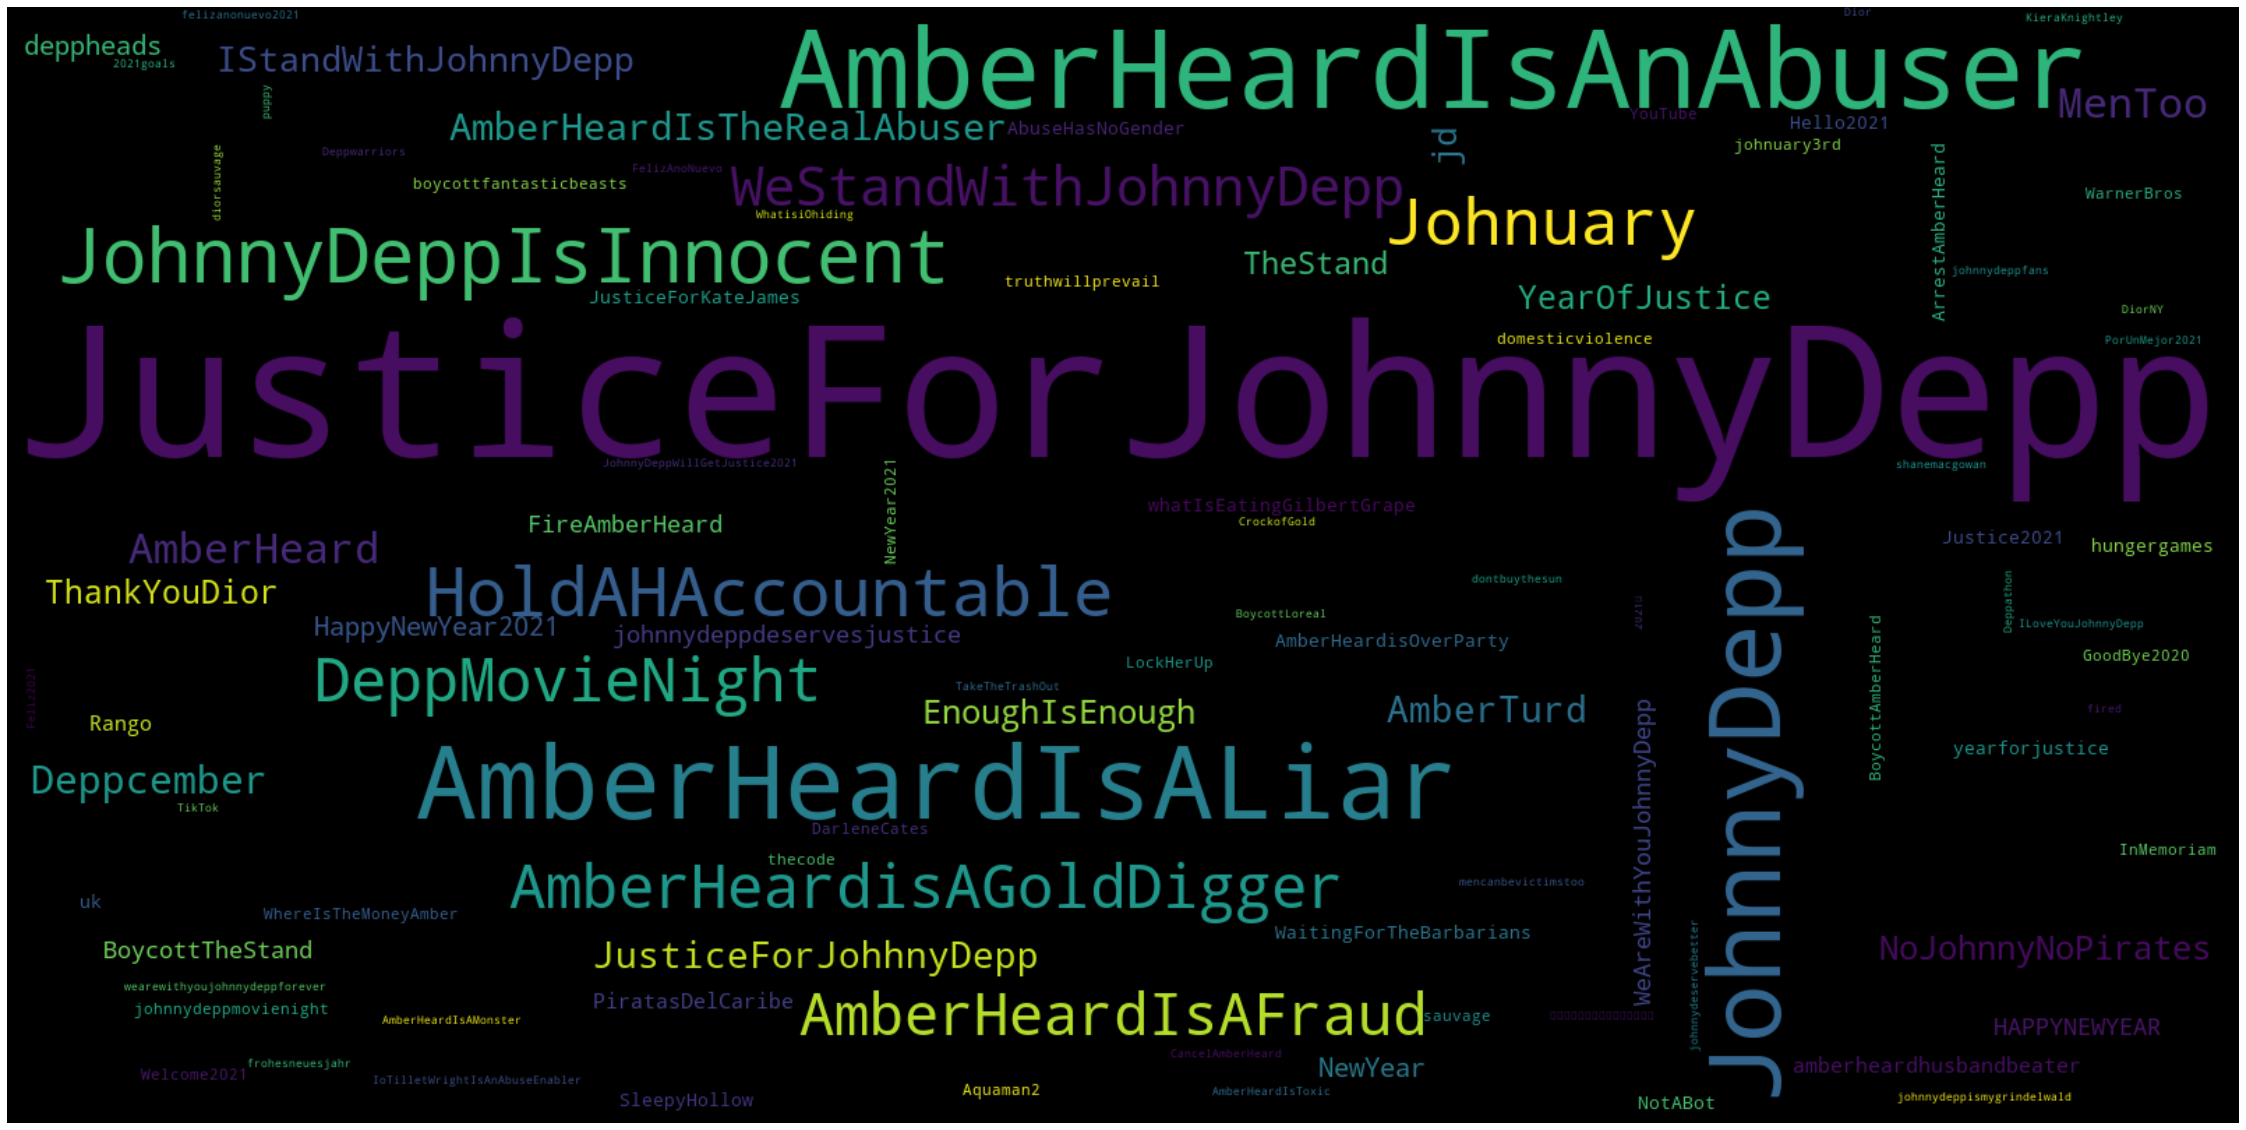

In [ ]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=100,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()